# Slow Water Removal

This notebook demonstrates how long it takes to remove water from geographies
when we produce maps.

In [114]:
# So we can run from within the censusdis project and find the packages we need.
import os
import sys

sys.path.append(
    os.path.join(os.path.abspath(os.path.join(os.path.curdir, os.path.pardir)))
)
import os

In [115]:
import censusdis.data as ced
import censusdis.maps as cem
import censusdis.states
# We can change the imported state here to NY 
STATE = censusdis.states.MD

In [116]:
YEAR = 2020
DATASET = "acs/acs5"
VARIABLE = "B19013_001E"

The default census geopgraphies often contain areas of water, which can be removed to avoid confusion in map areas along bodies of water. In this default geographic mapping, using the `%timeit` time magic function we can time the execution of downloading the dataset for the geographical map.

In [117]:
# This is the original resulting time 

%timeit ced.download(DATASET,YEAR,VARIABLE,state=STATE,county=["003", "005", "033", "009", "510"],tract="*",with_geometry=True,)

2.38 s ± 126 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<Axes: >

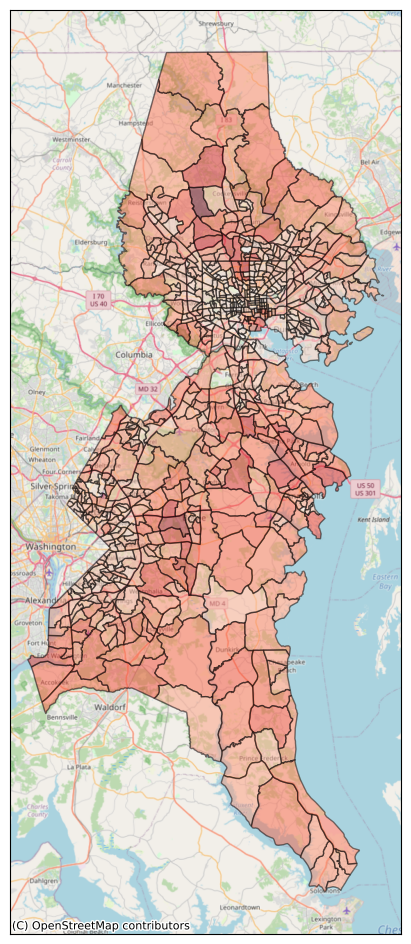

In [118]:
gdf_tract = ced.download(DATASET,YEAR,VARIABLE,state=STATE,county=["003", "005", "033", "009", "510"],tract="*",with_geometry=True,)
cem.plot_map(
    gdf_tract,   
    VARIABLE,
    with_background=True,
    edgecolor="black",
    alpha=0.5,
    cmap="Reds",
    figsize=(12, 12),
)

Setting the `remove_water=True` flag will remove water from the geographies we download. However, it does make the overall proess slower. By using `%timeit` we can see the time recorded is longer than without utilizing remove_water.

In [119]:
# This is with the remove_water resulting time 

%timeit ced.download(DATASET,YEAR,VARIABLE,with_geometry=True,remove_water=True,state=STATE,county=["003", "005", "033", "009", "510"],tract="*",)

/Users/audreymarthin/anaconda3/envs/censusProject/lib/python3.11/site-packages/shapely/set_operations.py:77: RuntimeWarning: invalid value encountered in difference
  return lib.difference(a, b, **kwargs)
/Users/audreymarthin/anaconda3/envs/censusProject/lib/python3.11/site-packages/shapely/set_operations.py:77: RuntimeWarning: invalid value encountered in difference
  return lib.difference(a, b, **kwargs)
/Users/audreymarthin/anaconda3/envs/censusProject/lib/python3.11/site-packages/shapely/set_operations.py:77: RuntimeWarning: invalid value encountered in difference
  return lib.difference(a, b, **kwargs)
/Users/audreymarthin/anaconda3/envs/censusProject/lib/python3.11/site-packages/shapely/set_operations.py:77: RuntimeWarning: invalid value encountered in difference
  return lib.difference(a, b, **kwargs)
/Users/audreymarthin/anaconda3/envs/censusProject/lib/python3.11/site-packages/shapely/set_operations.py:77: RuntimeWarning: invalid value encountered in difference
  return lib.di

5.42 s ± 110 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


/Users/audreymarthin/anaconda3/envs/censusProject/lib/python3.11/site-packages/shapely/set_operations.py:77: RuntimeWarning: invalid value encountered in difference
  return lib.difference(a, b, **kwargs)


<Axes: >

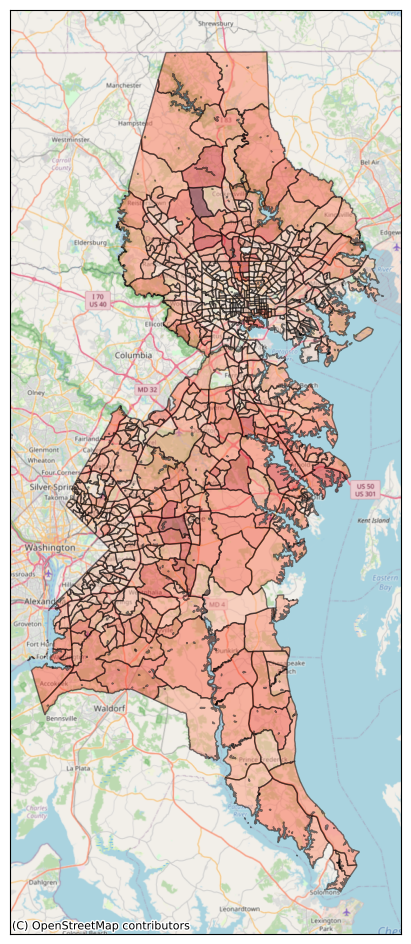

In [120]:
gdf_tract_no_water = ced.download(DATASET,YEAR,VARIABLE,with_geometry=True,remove_water=True,state=STATE,county=["003", "005", "033", "009", "510"],tract="*",)
cem.plot_map(
    gdf_tract_no_water,
    VARIABLE,
    with_background=True,
    edgecolor="black",
    alpha=0.5,
    cmap="Reds",
    figsize=(12, 12),
)